In [27]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
sns.set()


In [28]:
#Download csv from meagmillions site and add path like below:
path = 'C:/Users/Kieran Ram/Downloads/megamillions.csv'
df = pd.read_csv(path, header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Mega Millions,12,5,2003,12,44,15,18,1,42,4
1,Mega Millions,12,9,2003,14,15,48,4,24,41,4
2,Mega Millions,12,12,2003,16,32,46,9,45,26,4
3,Mega Millions,12,16,2003,47,16,31,24,46,47,3
4,Mega Millions,12,19,2003,5,10,39,17,35,38,3


In [29]:
df.columns = ['Type','Month','Day','Year',1,2,3,4,5,'Powerball', "Megaplier"]
df.tail(15)

,Type,Month,Day,Year,1,2,3,4,5,Powerball,Megaplier
1537,Mega Millions,8,28,2018,33,34,20,3,41,20,3
1538,Mega Millions,8,31,2018,7,18,45,32,29,17,3
1539,Mega Millions,9,4,2018,2,25,44,35,7,3,3
1540,Mega Millions,9,7,2018,8,68,10,54,41,10,2
1541,Mega Millions,9,11,2018,62,51,15,30,67,19,2
1542,Mega Millions,9,14,2018,40,66,23,30,43,13,4
1543,Mega Millions,9,18,2018,43,32,31,63,68,17,2
1544,Mega Millions,9,21,2018,11,52,64,2,1,9,4
1545,Mega Millions,9,25,2018,48,32,8,61,16,12,2
1546,Mega Millions,9,28,2018,39,56,45,52,59,15,3


In [30]:
def todate(row):
    date = pd.to_datetime(str(row['Month']) +'/' + str(row['Day']) + '/' + str(row['Year']))
    return date
df['Date'] = df.apply(todate, axis = 1)


In [31]:
df.describe()

,Month,Day,Year,1,2,3,4,5,Powerball,Megaplier
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,6.485180,15.708119,2010.861469,30.974227,30.992912,30.613402,30.640464,31.187500,18.970361,3.532861
std,3.440913,8.797704,4.298742,18.392858,18.384547,18.339692,18.303752,18.307856,13.547363,0.854436
min,1.000000,1.000000,2003.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,4.000000,8.000000,2007.000000,14.000000,16.000000,15.000000,16.000000,16.000000,8.000000,3.000000
50%,6.000000,16.000000,2011.000000,31.000000,31.000000,29.000000,30.000000,30.000000,15.000000,4.000000
75%,9.000000,23.000000,2015.000000,46.000000,46.000000,45.000000,45.000000,45.000000,30.000000,4.000000
max,12.000000,31.000000,2018.000000,75.000000,75.000000,75.000000,75.000000,75.000000,52.000000,5.000000


In [32]:
def rangefell(row):
    date = row['Date']
    if date > pd.to_datetime('10/28/2017'):
        maxnormal = 70
        maxmb = 25
    elif date > pd.to_datetime('10/18/2013'):
        maxnormal = 75
        maxmb = 15
    else:
        maxnormal = 56
        maxmb = 46
    spect = []
    for i in range(1, 6):
        spect.append(row[i]/maxnormal)
    retdict = dict(zip(range(6, 11), sorted(spect)))
    retdict['MP'] = row['Powerball']/maxmb
    return pd.Series(retdict)
df = df.join(df.apply(rangefell, axis = 1))
df

,Type,Month,Day,Year,1,2,3,4,5,Powerball,Megaplier,Date,6,7,8,9,10,MP
0,Mega Millions,12,5,2003,12,44,15,18,1,42,4,2003-12-05,0.017857,0.214286,0.267857,0.321429,0.785714,0.913043
1,Mega Millions,12,9,2003,14,15,48,4,24,41,4,2003-12-09,0.071429,0.250000,0.267857,0.428571,0.857143,0.891304
2,Mega Millions,12,12,2003,16,32,46,9,45,26,4,2003-12-12,0.160714,0.285714,0.571429,0.803571,0.821429,0.565217
3,Mega Millions,12,16,2003,47,16,31,24,46,47,3,2003-12-16,0.285714,0.428571,0.553571,0.821429,0.839286,1.021739
4,Mega Millions,12,19,2003,5,10,39,17,35,38,3,2003-12-19,0.089286,0.178571,0.303571,0.625000,0.696429,0.826087
5,Mega Millions,12,23,2003,2,49,13,21,22,52,4,2003-12-23,0.035714,0.232143,0.375000,0.392857,0.875000,1.130435
6,Mega Millions,12,26,2003,29,20,10,17,1,36,2,2003-12-26,0.017857,0.178571,0.303571,0.357143,0.517857,0.782609
7,Mega Millions,12,30,2003,46,21,12,32,18,49,4,2003-12-30,0.214286,0.321429,0.375000,0.571429,0.821429,1.065217
8,Mega Millions,1,2,2004,8,7,36,48,44,9,4,2004-01-02,0.125000,0.142857,0.642857,0.785714,0.857143,0.195652
9,Mega Millions,1,6,2004,32,7,15,25,13,9,4,2004-01-06,0.125000,0.232143,0.267857,0.446429,0.571429,0.195652


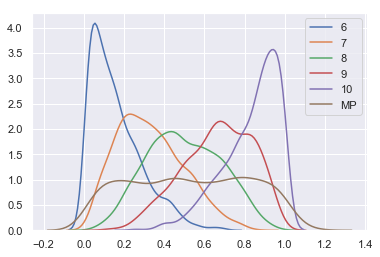

In [36]:
ax = sns.kdeplot(df[6])
for i in range(7, 11):
    sns.kdeplot(df[i], ax = ax)
sns.kdeplot(df['MP'], ax = ax)